In [3]:
%reset -f


In [4]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['r_ccsm4_h.out', 'r_ccsm4_f.out', 'r_canesm2_h.out', 'r_canesm2_f.out', 'r_miroc5_h.out', 'r_miroc5_f.out']


<ipython-input-58-0c6ea74f80cb>:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  ccsm4_h = pd.read_csv(os.path.join(rhemDIR,'r_ccsm4_h.out'), delim_whitespace=True, skiprows=[1])
<ipython-input-58-0c6ea74f80cb>:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  ccsm4_f = pd.read_csv(os.path.join(rhemDIR,'r_ccsm4_f.out'), delim_whitespace=True, skiprows=[1])
<ipython-input-58-0c6ea74f80cb>:18: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  canesm2_h = pd.read_csv(os.path.join(rhemDIR,'r_canesm2_h.out'), delim_whitespace=True, skiprows=[1])
<ipython-input-58-0c6ea74f80cb>:19: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep=

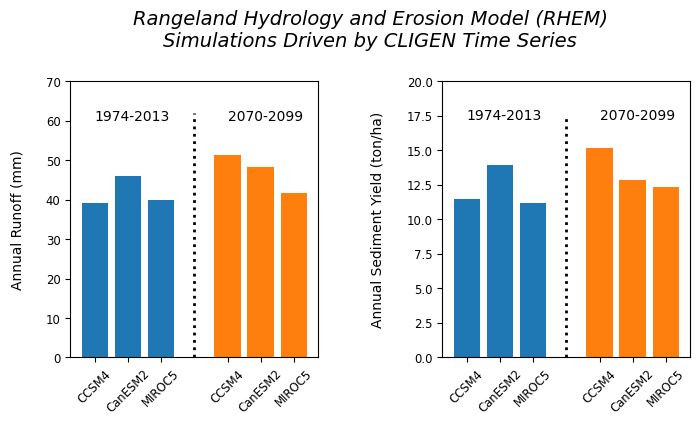

In [58]:

import os
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import pandas as pd

rhemDIR = '/content/drive/MyDrive/Colab Notebooks/POSTER_RHEM_RUNS/rhem'
saveFILE = '/content/drive/My Drive/GEE_Downloads/Fig_RHEM.jpg'


files = os.listdir(rhemDIR)
files = [f for f in files if f[-3:] == 'out']
print(files)


ccsm4_h = pd.read_csv(os.path.join(rhemDIR,'r_ccsm4_h.out'), delim_whitespace=True, skiprows=[1])
ccsm4_f = pd.read_csv(os.path.join(rhemDIR,'r_ccsm4_f.out'), delim_whitespace=True, skiprows=[1])

canesm2_h = pd.read_csv(os.path.join(rhemDIR,'r_canesm2_h.out'), delim_whitespace=True, skiprows=[1])
canesm2_f = pd.read_csv(os.path.join(rhemDIR,'r_canesm2_f.out'), delim_whitespace=True, skiprows=[1])

miroc5_h = pd.read_csv(os.path.join(rhemDIR,'r_miroc5_h.out'), delim_whitespace=True, skiprows=[1])
miroc5_f = pd.read_csv(os.path.join(rhemDIR,'r_miroc5_f.out'), delim_whitespace=True, skiprows=[1])


ccsm4_h_runoff = ccsm4_h['Q-runoff'].sum()/30.
ccsm4_h_sedyld = ccsm4_h['Sed-Yield'].sum()/30.
ccsm4_f_runoff = ccsm4_f['Q-runoff'].sum()/30.
ccsm4_f_sedyld = ccsm4_f['Sed-Yield'].sum()/30.

canesm2_h_runoff = canesm2_h['Q-runoff'].sum()/30.
canesm2_h_sedyld = canesm2_h['Sed-Yield'].sum()/30.
canesm2_f_runoff = canesm2_f['Q-runoff'].sum()/30.
canesm2_f_sedyld = canesm2_f['Sed-Yield'].sum()/30.

miroc5_h_runoff = miroc5_h['Q-runoff'].sum()/30.
miroc5_h_sedyld = miroc5_h['Sed-Yield'].sum()/30.
miroc5_f_runoff = miroc5_f['Q-runoff'].sum()/30.
miroc5_f_sedyld = miroc5_f['Sed-Yield'].sum()/30.



params = {'xtick.labelsize':'small',
          'ytick.labelsize':'small'}
pylab.rcParams.update(params)

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
plt.subplots_adjust(wspace=0.5, hspace=0.05, top=0.80)
fig.suptitle('Rangeland Hydrology and Erosion Model (RHEM)\nSimulations Driven by CLIGEN Time Series', size=14, fontstyle='oblique')



ax[0].text(1, 60, '1974-2013', size=10)
ax[0].text(5, 60, '2070-2099', size=10)
ax[0].set_ylabel('Annual Runoff (mm)\n')
ax[0].set_ylim(0, 70)
ax[0].bar([1, 2, 3], [ccsm4_h_runoff, canesm2_h_runoff, miroc5_h_runoff])
ax[0].set_xticks([1, 2, 3, 5, 6, 7], ['CCSM4', 'CanESM2', 'MIROC5', 'CCSM4', 'CanESM2', 'MIROC5'], rotation=45)
maxgraphdots = 62
ax[0].vlines(x=4, ymin=0, ymax=maxgraphdots, colors='black', ls=':', lw=2, label='vline_single - full height')
ax[0].bar([5, 6, 7], [ccsm4_f_runoff, canesm2_f_runoff, miroc5_f_runoff])

ax[1].text(1, 17.25, '1974-2013', size=10)
ax[1].text(5, 17.25, '2070-2099', size=10)
ax[1].set_ylabel('Annual Sediment Yield (ton/ha)\n')
ax[1].set_ylim(0, 20)
ax[1].bar([1, 2, 3], [ccsm4_h_sedyld, canesm2_h_sedyld, miroc5_h_sedyld])
ax[1].set_xticks([1, 2, 3, 5, 6, 7], ['CCSM4', 'CanESM2', 'MIROC5', 'CCSM4', 'CanESM2', 'MIROC5'], rotation=45)
maxgraphdots = 17.5
ax[1].vlines(x=4, ymin=0, ymax=maxgraphdots, colors='black', ls=':', lw=2, label='vline_single - full height')
ax[1].bar([5, 6, 7], [ccsm4_f_sedyld, canesm2_f_sedyld, miroc5_f_sedyld])

fig.savefig(saveFILE, dpi=600, bbox_inches='tight')





